# RKD HTTP JSON with Python Example: Time-Series Interday


## Time-Series Intraday Introduction
RKD Time-Series Intraday requests let you retrieve a timeseries of intraday market prices on an instrument, summarised in periods from 1 minute to 1 hour (configurable). This is typically used in an intraday graph to show how the price has changed during a day. 

For each period in the intraday timeseries, open price (the first tick in the period), close price (the last tick in the period), high price, low price and volume, Closing Yield value of the period, and Bid price and Ask price of the stock are returned. Intraday timeseries covering one day is returned.

The supported time intervals (periods) for Intraday timeseries are: 1 minute, 5 minutes, 30 minutes and 60 minutes


*Note*: 
* Intraday data is available for instruments up to 1 year previously. Timeseries Intraday request returns the latest traded price for the specified RIC even if the request is made during weekend or holidays.
* A maximum of 5000 points is retrievable in a single call to the Time Series service.
* Odd Lot Trades are not included in the OHLC and Volume Calculation and are not displayed in the Timeseries response if the parameter "Pre and Post Market Trading Sessions" is set in the request.


### RKD JSON application implementation process
The JSON application requires the following steps to consume data from RKD API services
1. Authentication with RKD Authentication service to get an authen token
2. Send a request message with the required input information and authen token to the interested RKD service

In [1]:
# #uncomment if you do not have requests installed

# #Install required packages in a current Jupyter kernal
# import sys
# !{sys.executable} -m pip install requests
# !{sys.executable} -m pip install matplotlib 
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install --upgrade mplfinance

In [2]:
# import requires libraries for HTTP Request and JSON Operation
import os
import sys
import requests
import json
from dotenv import load_dotenv

In [3]:
# HTTP operations function
def doSendRequest(url, requestMsg, headers):
    result = None
    try:
        result = requests.post(url, data=json.dumps(requestMsg), headers=headers)
    except requests.exceptions.RequestException as e:
        print('Exception!!!')
        print(e)
    return result

### Authentication Process

You should save a text file with **filename** `.env` or Environment Variables having the following configurations:

```
#RKD Access Credentials
RKD_USERNAME=<RKD Username>
RKD_PASSWORD=<RKD Password>
RKD_APP_ID=<RKD App ID>
```

For you reference, please see more detail regarding RKD Authentication service in [RKD Tutorial: Authentication](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api/tutorials#rkd-tutorial-authentication) page.

In [4]:
%load_ext dotenv
%dotenv

# Input your RKD credentials here

username = os.getenv('RKD_USERNAME')
password = os.getenv('RKD_PASSWORD')
appid = os.getenv('RKD_APP_ID')

In [5]:
# Authentication parameters
token = None
expire = None

In [6]:
# RKD Authenticaion request message

authenMsg = {'CreateServiceToken_Request_1': {'ApplicationID': appid, 'Username': username, 'Password': password}}

# RKD Authentication service URL

authenURL = (
    'https://api.rkd.refinitiv.com/api/'
    'TokenManagement/TokenManagement.svc/REST/'
    'Anonymous/TokenManagement_1/CreateServiceToken_1'
)

# RKD Authentication headers

authen_headers = {'content-type': 'application/json;charset=utf-8'}

In [7]:
# Send Authentication request

authenResult = doSendRequest(authenURL, authenMsg, authen_headers)

In [8]:
if authenResult and authenResult.status_code == 200:
    print('Authen success')
    # print('JSON resonse: %s' % (json.dumps(authenResult.json(),sort_keys=True, indent=2, separators=(',', ':'))))
    token = authenResult.json()['CreateServiceToken_Response_1']['Token']
    expire = authenResult.json()['CreateServiceToken_Response_1']['Expiration']
elif authenResult.status_code != 200:
    print('Authen fail with status code %s' % authenResult.status_code)
    if authenResult.status_code == 500:
        print('Error: %s' % (json.dumps(authenResult.json(), sort_keys=True, indent=2, separators=(',', ':'))))

Authen success


### RKD Time-Series: Intraday Service detail
#### RKD Service Token URL and Header

RKD Time Series provides Intraday data for developers via GetIntradayTimeSeries_5 operation. The latest endponint of GetInterdayTimeSeries_5 operaion is the following URL:
[http://api.rkd.refinitiv.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetIntradayTimeSeries_5](http://api.rkd.refinitiv.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetIntradayTimeSeries_5)

- Header: 
  - Content-type = application/json
  - X-Trkd-Auth-ApplicationID = Application ID
  - X-Trkd-Auth-Token = service Token
- Method: Post

#### HTTP Request Post Body
The GetIntradayTimeSeries_5 operation requires the following properties in a request message's body
- Symbol: A RIC of the instrument for the interday prices you want to retrieve
- StartTime: Start date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- EndTime: End date and time criteria of the search. The format of the Start time should be:
yyyy-mm-ddThh:mm:ss
- Interval: The interval between samples. The choices are "MINUTE", "5MINUTES", "30MINUTES" and "HOUR".


You can find more detail regarding optional properties (such as in "TrimResponse" or "Field") in [RKD API Development Guide document](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api/documentation).

The request message structure is following
```
{
    "GetIntradayTimeSeries_Request_5":{
      "Symbol": <RIC name>,
      "StartTime": <yyyy-mm-ddThh:mm:ss>,
      "EndTime": <yyyy-mm-ddThh:mm:ss>,
      "Interval": "DAILY"
   }
}
```
*Note*: Please pay attention that maximum "EndDate" interval is >=2038. If you specify a greater "EndDate" interval, you receive a blank response.

#### HTTP Response

The application receives a HTTP response message from RKD from GetIntradayTimeSeries_5 operatio operation as the following attributes.
- HTTP Status: 200 OK
- Header: Content-type = application/json

The example of a response message for MSFT.O symbol and Daily interval is shown below
```
{
  "GetIntradayTimeSeries_Request_5":{
    "MetaFields":{
      "CCY":"USD",
      "NAME":"MICROSOFT CP",
      "QOS":"RT",
      "TZ":"NYC",
      "TZOFFSET":-300
    },
     "Row":[
      {
        "CLOSE":131.0,
        "HIGH":131.0,
        "LOW":130.5,
        "OPEN":130.5,
        "TIMESTAMP":"2019-03-18T03:00:00+00:00"
      },
      {
        "CLOSE":130.0,
        "HIGH":131.5,
        "LOW":130.0,
        "OPEN":130.5,
        "TIMESTAMP":"2019-03-18T04:00:00+00:00"
      }
    ]
  }
}
```


In [16]:
# Time-Series Interday parameters

ricName = 'SCB.BK'
#change your fields (support these 'OPEN','HIGH','LOW','CLOSE','CLOSEYIELD','VOLUME','BID','ASK' fields only)
fields = ['OPEN','HIGH','LOW','CLOSE'] 

startTime = '2021-03-17T00:00:00' #change your StartTime
endtime = '2021-04-18T23:59:00'  #change your EndTime

# change your interval between 'MINUTE', '5MINUTES', '30MINUTES' and 'HOUR'
interval = 'HOUR'

In [17]:
# RKD Time-Series Interday Service URL
intradayURL = 'http://api.rkd.refinitiv.com/api/TimeSeries/TimeSeries.svc/REST/TimeSeries_1/GetIntradayTimeSeries_5'

# RKD Time-Series Interday request message headers
intraday_headers = {
    'content-type': 'application/json;charset=utf-8' ,
    'X-Trkd-Auth-ApplicationID': appid, 
    'X-Trkd-Auth-Token' : token
}

# RKD Time-Series Interday request message 
intradayRequestMsg = {
        'GetIntradayTimeSeries_Request_5':{
            'Field': fields,
            'TrimResponse': False,
            'Symbol': ricName,
            'StartTime':startTime,
            'EndTime':endtime,  
            'Interval':interval,
            'MetaField': ['NAME','QOS','CCY','TZ','TZOFFSET','NAME_LL']
        }
    }

In [18]:
# Send Time-Series: Interday request

intradayResult = doSendRequest(intradayURL, intradayRequestMsg, intraday_headers)

In [19]:
if intradayResult and intradayResult.status_code == 200:
        print('Time Series Interday response message: ')
        print(json.dumps(intradayResult.json(), sort_keys=True, indent=2, separators=(',', ':')))

Time Series Interday response message: 
{
  "GetIntradayTimeSeries_Response_5":{
    "MetaFields":{
      "CCY":"THB",
      "NAME":"THE SIAM COMMERC",
      "QOS":"DLY",
      "TZ":"BKK",
      "TZOFFSET":420
    },
    "Row":[
      {
        "CLOSE":111.0,
        "HIGH":111.0,
        "LOW":110.5,
        "OPEN":110.5,
        "TIMESTAMP":"2021-03-22T03:00:00+00:00"
      },
      {
        "CLOSE":109.5,
        "HIGH":111.0,
        "LOW":108.5,
        "OPEN":110.5,
        "TIMESTAMP":"2021-03-22T04:00:00+00:00"
      },
      {
        "CLOSE":109.5,
        "HIGH":109.5,
        "LOW":109.0,
        "OPEN":109.5,
        "TIMESTAMP":"2021-03-22T05:00:00+00:00"
      },
      {
        "CLOSE":110.0,
        "HIGH":110.0,
        "LOW":109.5,
        "OPEN":109.5,
        "TIMESTAMP":"2021-03-22T06:00:00+00:00"
      },
      {
        "CLOSE":109.5,
        "HIGH":110.0,
        "LOW":109.5,
        "OPEN":109.5,
        "TIMESTAMP":"2021-03-22T08:00:00+00:00"
      },
      

### Creating a Pandas Data Frame
Next, we convert incoming JSON object to a [Pandas](https://pandas.pydata.org/) Data Frame object. We get a list of columns names from the JSON object and construct a data frame named *df*.

In [20]:
# import requires Pandas and matplotlib libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import seaborn; seaborn.set()

In [21]:
intraday_data = intradayResult.json()['GetIntradayTimeSeries_Response_5']['Row']

In [22]:
columns = [key for key in intraday_data[0]]

In [23]:
df = pd.DataFrame(intraday_data, columns = columns)


In [24]:
# check Data Frame object output
if not df.empty:
    print('Data Frame row numbers = %d' % len(df.index))
    print('Example 10 rows are:')
    print(df.head(10))

Data Frame row numbers = 112
Example 10 rows are:
    OPEN   HIGH    LOW  CLOSE                  TIMESTAMP
0  110.5  111.0  110.5  111.0  2021-03-22T03:00:00+00:00
1  110.5  111.0  108.5  109.5  2021-03-22T04:00:00+00:00
2  109.5  109.5  109.0  109.5  2021-03-22T05:00:00+00:00
3  109.5  110.0  109.5  110.0  2021-03-22T06:00:00+00:00
4  109.5  110.0  109.5  109.5  2021-03-22T08:00:00+00:00
5  110.0  110.5  109.5  109.5  2021-03-22T09:00:00+00:00
6  110.0  110.0  109.5  109.5  2021-03-22T10:00:00+00:00
7  110.0  110.0  109.0  109.5  2021-03-23T03:00:00+00:00
8  109.5  110.0  109.0  109.5  2021-03-23T04:00:00+00:00
9  109.5  110.5  109.5  110.0  2021-03-23T05:00:00+00:00


## Ploting Graph
We use Python [Matplotlib](https://matplotlib.org/) library to plot a graph from Pandas Data Frame object. The target graph compares 'Open', 'High', 'Low' and 'Close' data between time ('Timestamp' field). 

We firstly re-arrange and re-format the Timestamp value in the Data Frame object to use it in X-axis for the graph.

In [25]:
df['TIMESTAMP']= df['TIMESTAMP'].str.split('T00').str[0]
df.sort_values('TIMESTAMP',ascending=True,inplace=True)

Then we plotting a graph, the X-axis is 'Timestamp' values and the Y-axis is fields values.

<AxesSubplot:xlabel='TIMESTAMP'>

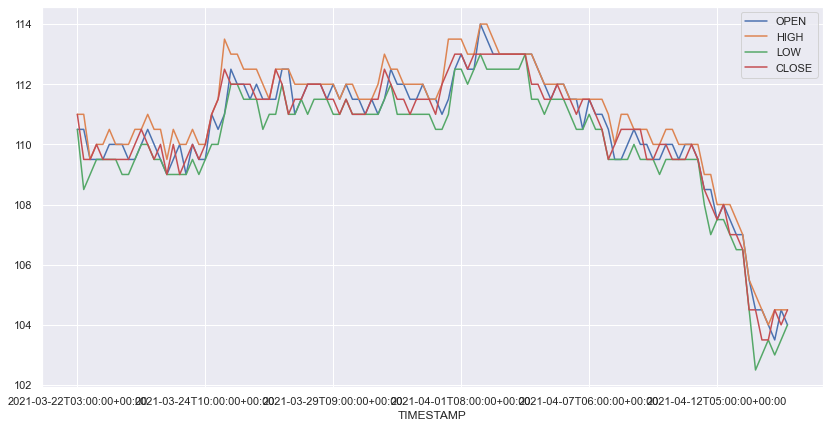

In [26]:
df.plot(x = 'TIMESTAMP',y = fields,figsize=(14,7))

## Ploting CandleStick Graph
We use Python [mpl-finance](https://pypi.org/project/mpl-finance/) library to plot a candlestick graph from Pandas Data Frame object. The target graph compares 'Open', 'High', 'Low' and 'Close' data between time ('Timestamp' field). 

In [27]:
import datetime as dt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

In [28]:
candle_df = df[['OPEN','HIGH','LOW','CLOSE']]

In [29]:
candle_df.insert(0,'TIMESTAMP', df['TIMESTAMP'].map(mdates.datestr2num))

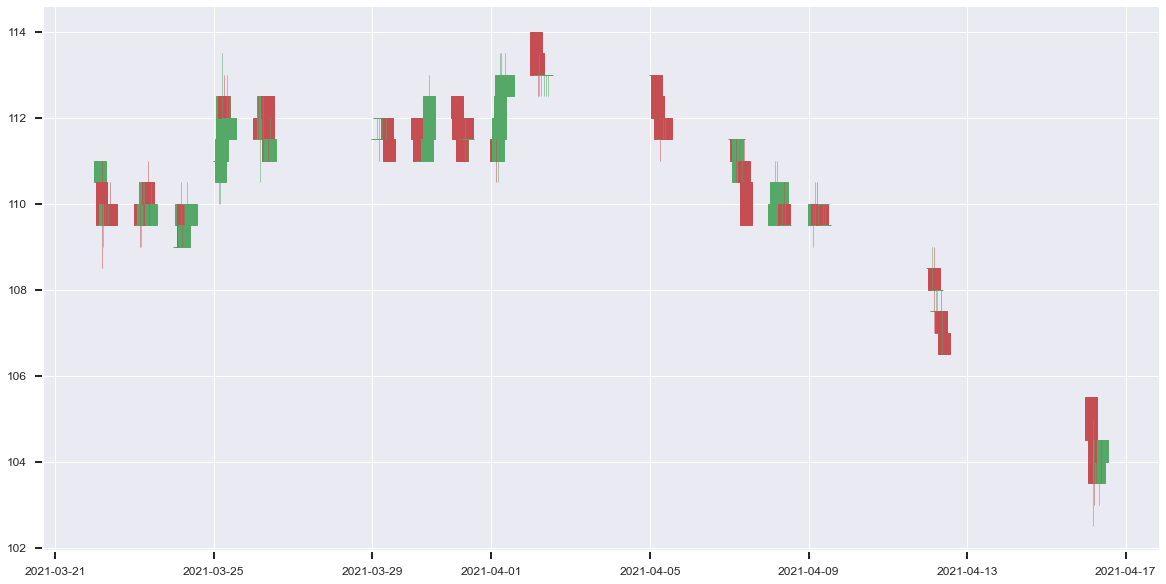

In [30]:
fig = plt.figure(figsize=(20, 10))
ax = plt.subplot()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.tick_params(axis='both', direction='out', width=2, length=8,
               labelsize=12, pad=8)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)

candlestick_ohlc(ax, candle_df.values, width = 0.3, colorup = 'g', colordown = 'r')
ax.xaxis_date()
ax.grid(True)
plt.show()

## References
For further details, please check out the following resources:
* [Refinitiv Knowledge Direct API page](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api) on the [Refinitiv Developer Community](https://developers.refinitiv.com/) website.
* [Refinitiv Knowledge Direct API Catalog](https://support-portal.rkd.refinitiv.com/SupportSite/Home/Index) website.
* [RKD Tutorial: Time-Series - Interday](https://developers.refinitiv.com/en/api-catalog/refinitiv-knowledge-direct/refinitiv-knowledge-direct-api-rkd-api/tutorials#rkd-tutorial-time-series-interday) page.

For any question related to this tutorial or RKD API, please use the Developer Community [Q&A Forum](https://community.developers.refinitiv.com/spaces/51/view.html).